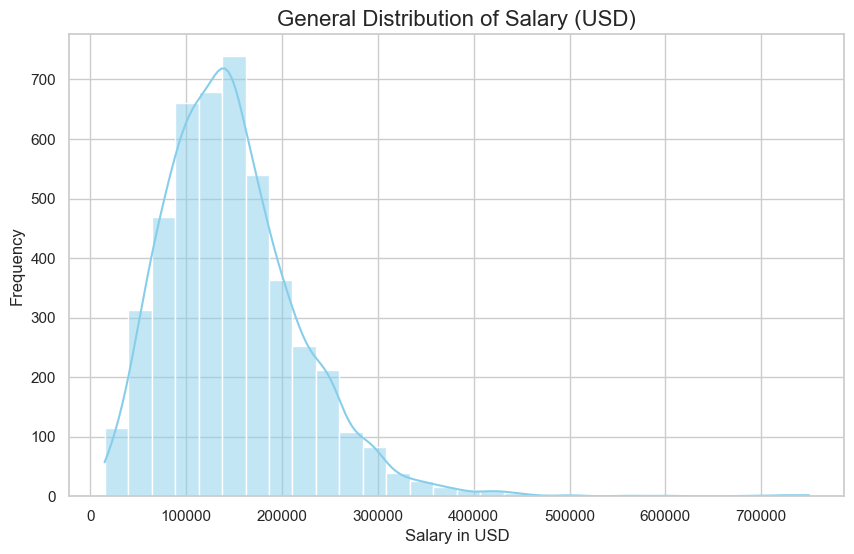

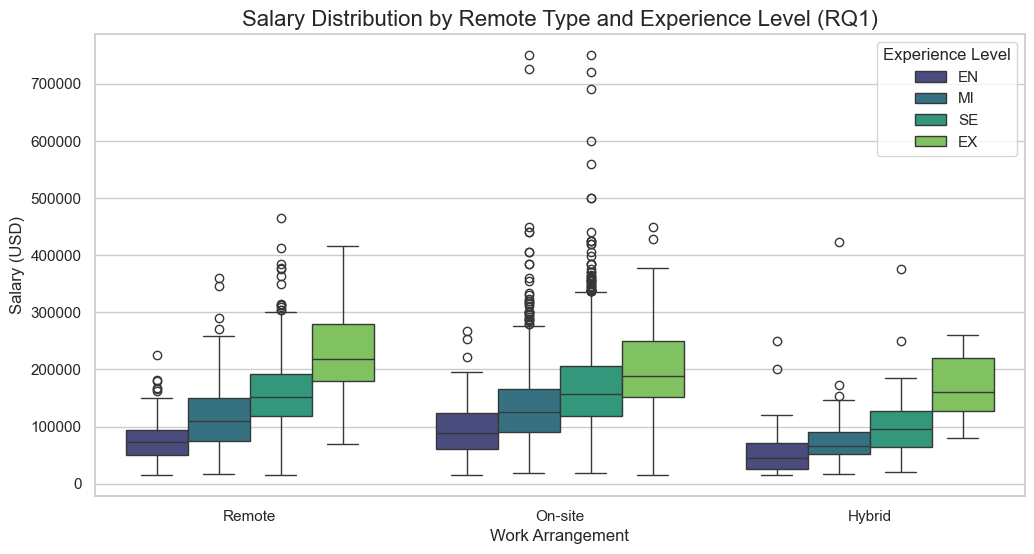

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_2752\2643133131.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


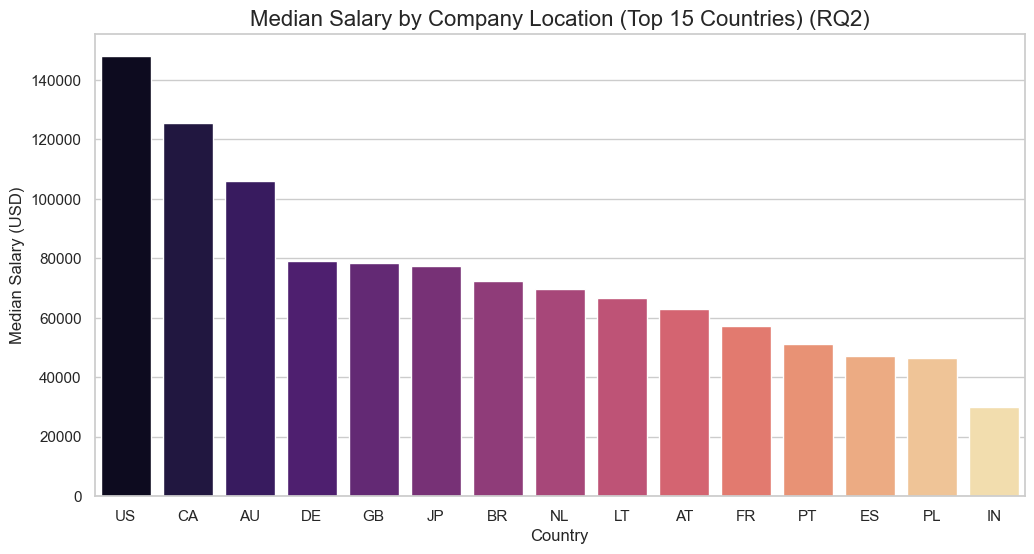

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_2752\2643133131.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


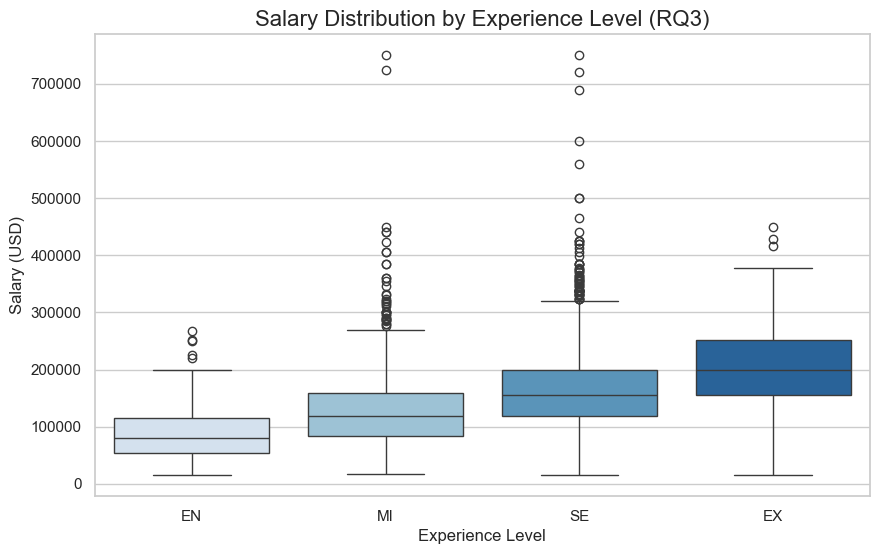

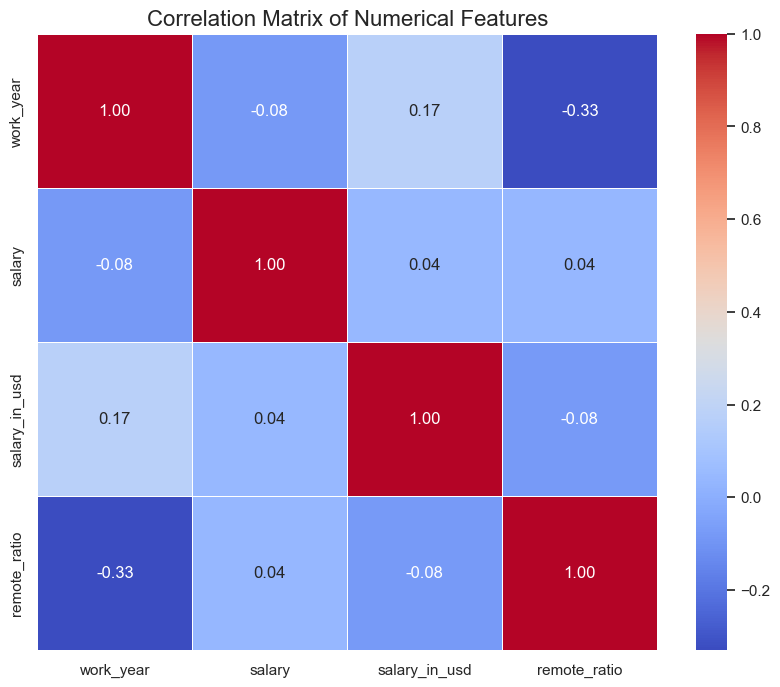

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. SETUP AND DATA LOADING
# ==========================================
# Load the dataset
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set the visual style for all plots
sns.set(style="whitegrid")

# Define the logical order for experience levels
experience_order = ['EN', 'MI', 'SE', 'EX']

# Create a readable label for Remote Ratio
df['remote_label'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

# ==========================================
# 2. VISUAL 1: GENERAL SALARY DISTRIBUTION
# ==========================================
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title('General Distribution of Salary (USD)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# ==========================================
# 3. VISUAL 2 (RQ1): REMOTE WORK IMPACT
# ==========================================
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='remote_label',
    y='salary_in_usd',
    hue='experience_level',
    data=df,
    hue_order=experience_order,
    palette='viridis'
)
plt.title('Salary Distribution by Remote Type and Experience Level (RQ1)', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Experience Level')
plt.show()

# ==========================================
# 4. VISUAL 3 (RQ2): GEOGRAPHIC ARBITRAGE
# ==========================================
# Filter for top 15 countries to keep the chart readable
top_countries = df['company_location'].value_counts().head(15).index
country_salary = df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='company_location',
    y='salary_in_usd',
    data=country_salary,
    palette='magma'
)
plt.title('Median Salary by Company Location (Top 15 Countries) (RQ2)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 5. VISUAL 4 (RQ3): TEAM COMPOSITION COST
# ==========================================
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=experience_order,
    palette='Blues'
)
plt.title('Salary Distribution by Experience Level (RQ3)', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 6. VISUAL 5: CORRELATION MATRIX
# ==========================================
# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()